# Example usage

Here is a demonstration of how to use `group10pack` to perform the investment outcome analysis

## Imports

In [71]:
from group10pack.alpha_tuning import ridge_alpha_tuning
from group10pack.format_histograms import format_histograms
from group10pack.inv_outcome_plot import inv_outcome_plot
from group10pack.KNN_tuning import KNN_tuning
from group10pack.split_drop import split_drop
from pandas import DataFrame
import numpy as np
from sklearn.preprocessing import StandardScaler

## Creating the Data

We will first set up the data for this tutorial:

In [81]:
def toy_dataset():
    return DataFrame({"x": np.arange(1,1000,1),
        "x2": np.arange(1,1000,1),
        "x3": np.arange(1,1000,1),
        "x34": np.arange(1,1000,1),
        "x35": np.arange(1,1000,1),
        "x38": np.arange(1,1000,1),
        "y": np.arange(1,1000,1)
})

In [82]:
data = toy_dataset()
data

,x,x2,x3,x34,x35,x38,y
0,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
994,995,995,995,995,995,995,995
995,996,996,996,996,996,996,996
996,997,997,997,997,997,997,997
997,998,998,998,998,998,998,998


## Split Drop

This function splits the given dataset into a training set and a testing set, further splitting each set into one without a specified column, and one with only said specified column.

In [83]:
train_X, train_Y, test_X, test_Y = split_drop(data, 0.3, 123, "y")

## Alpha Tuning

This function applies the given processor to both training sets output by the split_drop function, and finds the best value of alpha to be used for Ridge Regression using a specified number of folds.

In [93]:
alpha = [1, 10, 100]

In [94]:
ridge_alpha_tuning(alpha, StandardScaler(), train_X, train_Y, cv=2)

1

## Investment Outcome Plot

 This function generates normalized stacked bar charts showing proportions of 
    major earner/non major earner individuals that made money on investments,
    and proportion of individuals that lost money on investments among families 
    of different size

In [95]:
toy_dataset =  DataFrame({"size":[1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7],
                    "bar_split_var":[1,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2],
                    "actual_val":[False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,
                                 False,True,False,True,False,True,False,True,False,True,False,True],
                    "pred_val": [False,False,False,True,False,True,False,True,False,True,True,True,False,True,False,False,
                                 False,True,True,True,False,False,False,True,True,True,False,True],
                     "counts": [320, 300, 180, 500, 488, 600, 700, 800, 240, 500, 400, 120, 400, 300, 
                               500, 500, 320, 980, 890, 750, 210, 540, 320, 450, 560, 760, 580, 650]})

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\group10pack\inv_outcome_plot.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_fam_size_df[i][counts_col] = list_of_fam_size_df[i][counts_col].div(np.sum(list_of_fam_size_df[i][counts_col]))


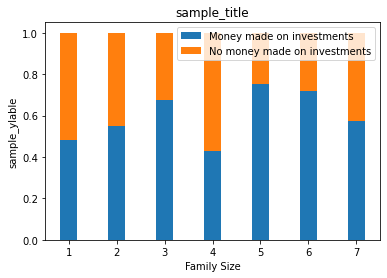

In [96]:
list_of_col_names = list(toy_dataset.columns)
sb_chart = inv_outcome_plot(toy_dataset, 
                         list_of_col_names[0], 
                         list_of_col_names[1], 
                         list_of_col_names[2], 
                         list_of_col_names[4],
                         True,
                         "sample_title", 
                         "sample_ylable")

## Format Histograms

A function used to format a pandas generic histograms

In [89]:
texts = { 'titles':['title1', 'title2', 'title3']}

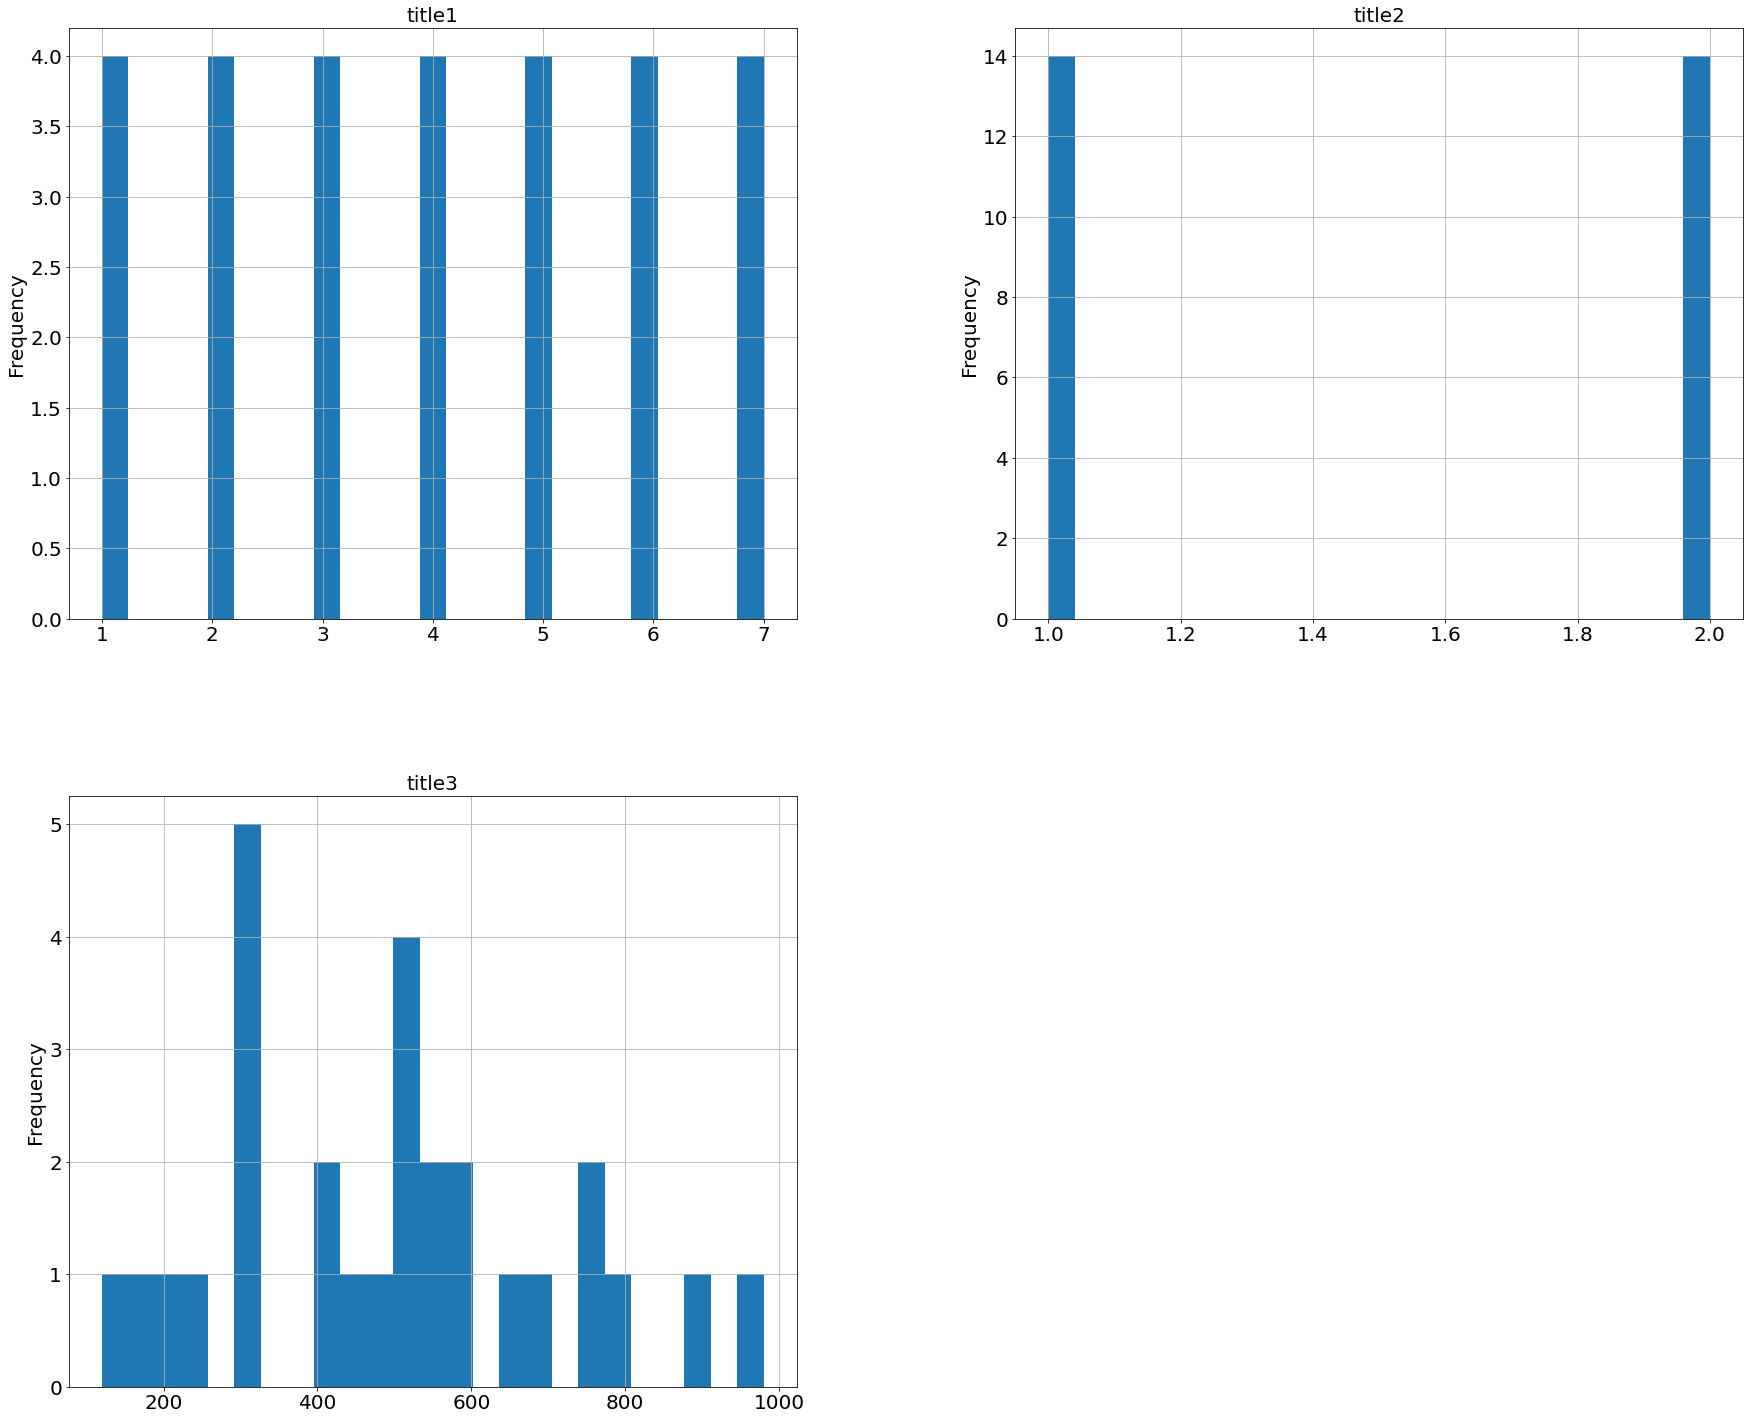

In [90]:
histograms = format_histograms(toy_dataset, texts)